Download das bibliotecas necessarias:

In [ ]:
pip install ucimlrepo pandas seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


CARREGANDO O DATABASE  

In [34]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = fetch_ucirepo(id=53) 
print(iris.variables) 



           name     role         type demographic  \
0  sepal length  Feature   Continuous        None   
1   sepal width  Feature   Continuous        None   
2  petal length  Feature   Continuous        None   
3   petal width  Feature   Continuous        None   
4         class   Target  Categorical        None   

                                         description units missing_values  
0                                               None    cm             no  
1                                               None    cm             no  
2                                               None    cm             no  
3                                               None    cm             no  
4  class of iris plant: Iris Setosa, Iris Versico...  None             no  


In [35]:

df = iris.data.features
df['target'] = iris.data.targets
display(df)


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
df.groupby("target").describe()

sepal length                                              \
                       count   mean       std  min    25%  50%  75%  max   
target                                                                     
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal width         ... petal length      petal width         \
                      count   mean  ...          75%  max       count   mean   
target                              ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
target                                              
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

REMOVE OS VALORES NULOS CASO EXISTAM NO DATABASE

In [37]:
values = df.isnull().sum().sum()
print('quantidades de dados nulos:', values)
if values > 0 :
    df = df.dropna()

pd.DataFrame(df)

quantidades de dados nulos: 0


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


IDENTIFICANDO QUAIS SAO AS CLASSES E SEUS VALORES

In [38]:

classes = df["target"].unique()
print('CLASSES:')
print(classes)

classesCounter = df['target'].value_counts()
print('\nCONTAGEM POR CLASSE:')
print(classesCounter)

CLASSES:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

CONTAGEM POR CLASSE:
target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


MEDIDAS DE TENDENCIA CENTRAL DO CONJUNTO

In [39]:
medias = df.drop(columns=["target"]).mean()
medianas = df.drop(columns=["target"]).median()
modas = df.drop(columns=["target"]).apply(lambda x: x.mode().iloc[0])
print('MEDIAS GERAIS:\n')
print(medias)
print('\nMODAS GERAIS:\n')
print(medianas)
print('\nMEDIANAS GERAIS:\n')
print(modas)

MEDIAS GERAIS:

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

MODAS GERAIS:

sepal length    5.80
sepal width     3.00
petal length    4.35
petal width     1.30
dtype: float64

MEDIANAS GERAIS:

sepal length    5.0
sepal width     3.0
petal length    1.5
petal width     0.2
dtype: float64


MEDIDAS DE TENDECIAS CENTRAL DO CONJUNTO POR CLASSE

In [40]:
medias = df.groupby("target").mean()
medianas = df.groupby("target").median()
modas = df.drop(columns=["target"]).groupby(df["target"]).apply(lambda x: x.mode().iloc[0])
print('MEDIAS:\n')
print(medias)
print('\nMODAS:\n')
print(medianas)
print('\nMEDIANAS:\n')
print(modas)

MEDIAS:

                 sepal length  sepal width  petal length  petal width
target                                                               
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026

MODAS:

                 sepal length  sepal width  petal length  petal width
target                                                               
Iris-setosa               5.0          3.4          1.50          0.2
Iris-versicolor           5.9          2.8          4.35          1.3
Iris-virginica            6.5          3.0          5.55          2.0

MEDIANAS:

0                sepal length  sepal width  petal length  petal width
target                                                               
Iris-setosa               5.0          3.4           1.5          0.2
Iris-versicolor           5.5          3.0           4.5    

DISTRIBUICAO DE VARIAVEIS DO CONJUNTO

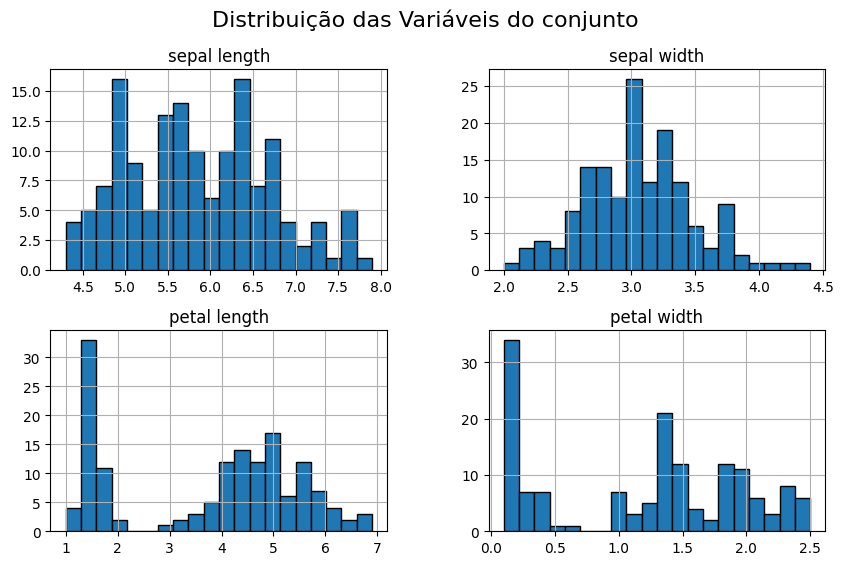

In [41]:
df.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Distribuição das Variáveis do conjunto", fontsize=16)

#exportando o grafico das distribuicoes gerais 
plt.savefig('grafico.png')

plt.show()



GRAFICOS DE DISTRIBUICAO DE VARIAVEIS POR ESPECIE

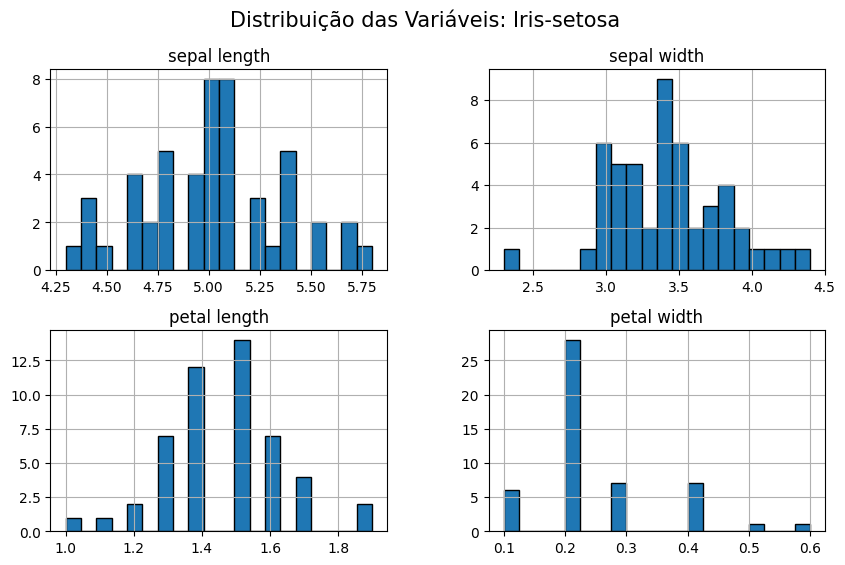

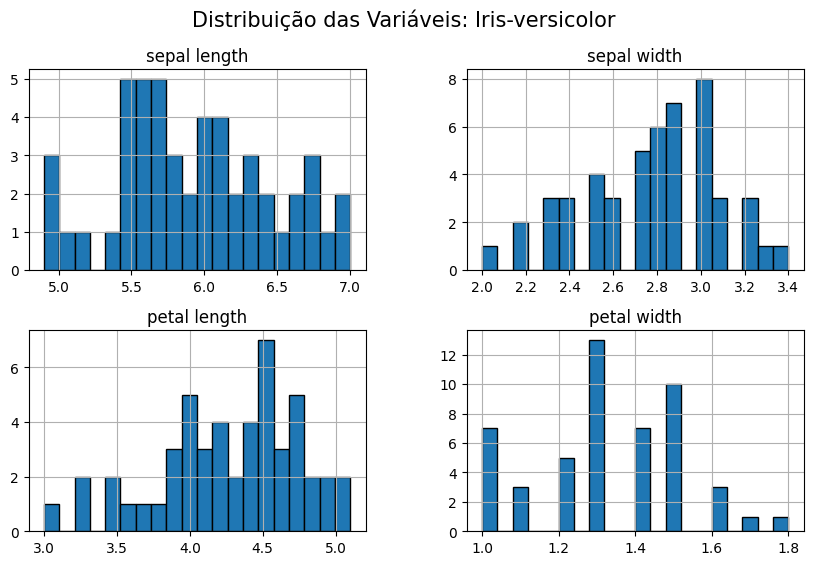

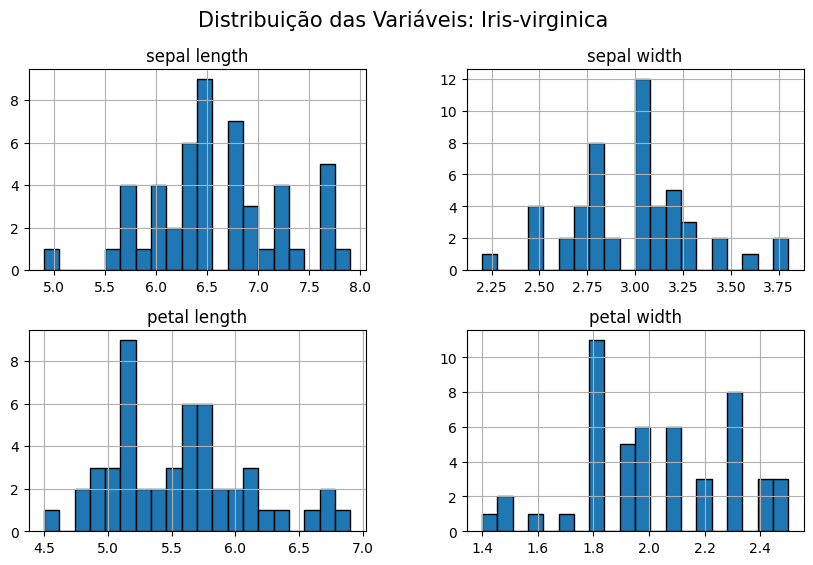

In [42]:
classes = df.groupby("target")
for nome, classe in classes:
    classe.hist(figsize = (10, 6), bins = 20, edgecolor="black")
    plt.suptitle(f"Distribuição das Variáveis: {nome}", fontsize = 15)
    plt.show()

GRAFICO DE CORRELACAO GERAL 

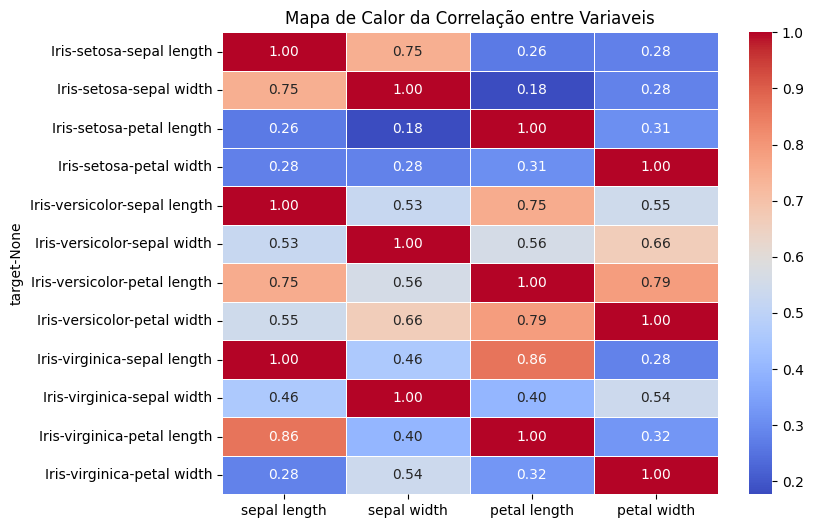

In [43]:
classes = df.groupby("target")
corrMatrix = classes.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Mapa de Calor da Correlação entre Variaveis")
plt.show()



Verificando a importancia de cada variavel em relacao as classes.


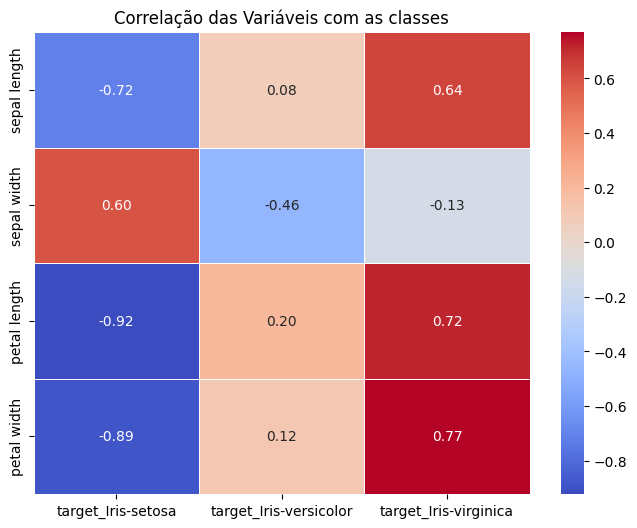

In [44]:

df_encoded = pd.get_dummies(df, columns=["target"])
correlation_species = df_encoded.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_species.iloc[:-3, -3:], annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação das Variáveis com as classes")
plt.show()


Criando novas colunas de valores binarios para cada classes, sendo 0 se nao for da classe e 1 caso seja, podemos aplicar um grafico de correlação entre esses valores e determinar quais variaveis tem mais relação.
Sendo que quando mais proximo de 1, mais aquela variavel ta relacionada com o fato de ser da respectiva classe, e quanto mais proximo de -1 menos relação.

Apartir disso podemos notar que:  

Para a Iris-Setosa a variavel sepal width teve uma corelação muito maior que as demais.  
para a Iris-Versicolor embora os valores sejam relativamente pequenos e proximos, petal lenght tem uma influecia um pouco maior.  
por fim a Iris-virginica que tem os valores proximos também, porem altos, no qual o maior foi petal width sendo a de maior corelação 
